In [1]:
import sys
sys.path.insert(0, "/home/martin/anaconda2/lib/python2.7/site-packages")

import vaex
import pyfits
from matplotlib import pyplot as plt
from astropy.table import join, Table
import ipywidgets as widgets
import numpy as np

%matplotlib inline

import pandas as pd
import multiprocessing

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# dat = vaex.open("RAVE_TGAS.fits")
# dat1 = Table.read("RAVE_DR5.fits")
# dat2 = Table.read("RAVE_TGAS.fits")

In [4]:
dat = vaex.open("RAVE_merged.fits")

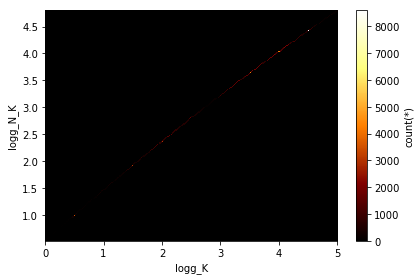

In [5]:
dat.plot("logg_K", "logg_N_K")

In [6]:
# df1 = dat.to_astropy_table()
# df2 = dat2.to_astropy_table()
# print dat.all_column_names
#df = join(dat1, dat2, keys='RAVE_OBS_ID', join_type='inner')

In [7]:
df = {"alpha" : dat["Alpha_c"].columns["Alpha_c"].tolist(),
     "dist" : (1./ dat["parallax_2"].columns["parallax_2"]).tolist(),
     "l" : dat["l"].columns["l"].tolist(),
     "b" : dat["b"].columns["b"].tolist(),
      "pmra" : dat["pmra"].columns["pmra"].tolist(),
      "grav" : dat["logg_N_K"].columns["logg_N_K"].tolist(),
      "met" : dat["Met_N_K"].columns["Met_N_K"].tolist(),
      "pmdec" : dat["pmdec"].columns["pmdec"].tolist(),
     "temp" : dat["Teff_IR"].columns["Teff_IR"].tolist()}
df = pd.DataFrame(df)


In [17]:
size_groups = [((None, 3.0) ,80, "Giants"),
               ((3.0, None),10, "Dwarfs")]

@widgets.interact(dist=(0.01,5.0,0.002), width=(0.001,1,0.009), l=(0,360,20), window_l = (10,360,2), arr=[True,False])
def slide_thru(dist=0.8, width=0.01, l=200, window_l = 140, arr=True):
    
    window_b = 180
    
    
    rdf = df[df["dist"] > dist - width / 2.]
    rdf = rdf[rdf["dist"] < dist + width /2.0]
    rdf = rdf[rdf["l"] < l + window_l / 2.]
    rdf = rdf[rdf["l"] >= l - window_l / 2.]
       
    plt.figure(figsize=(9,7))  
        
    for gr, size, lab in size_groups:
        if gr[0]:
            rdf1 = rdf[rdf["grav"] > gr[0]]
        else:
            rdf1 = rdf
        
        if gr[1]:
            rdf2 = rdf1[rdf1["grav"] < gr[1]]
            
            
        
        if arr:
            plt.quiver(rdf2["l"], rdf2["b"], rdf2["pmra"] / 5., rdf2["pmdec"] / 5. , width=0.008)
        plt.scatter(rdf2["l"], rdf2["b"], s=size, c=rdf2["met"], vmin=-1.5, vmax=0.5, cmap="jet", label=lab)
        
    plt.title("Slice of width {0} pc around {1} pc from the Earth".format(dist*1000, width*1000))
    plt.xlabel("l [deg]")
    plt.ylabel("b [deg]")
    plt.colorbar()      
    plt.legend()
    plt.show()

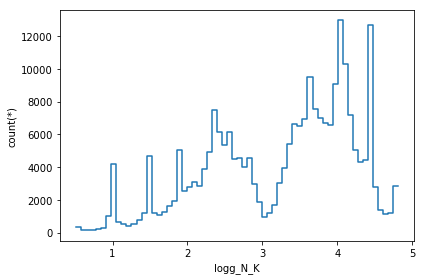

In [9]:
dat.plot1d("logg_N_K")